In [5]:
#Importations des packages

# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd

# Importation de la bibliothèque numpy pour les opérations numériques
import numpy as np

# Importation d'une fonction pour créer une matrice de dispersion
from pandas.plotting import scatter_matrix

# Importation de la bibliothèque matplotlib pour la visualisation
import matplotlib.pyplot as plt

# Importation de la bibliothèque seaborn pour des graphiques statistiques plus avancés
import seaborn as sns

# Importation de scikit-learn pour la prétraitement des données
from sklearn import preprocessing

# Importation d'une classe pour standardiser les données
from sklearn.preprocessing import StandardScaler

# Importation de scikit-learn pour l'analyse en composantes principales (PCA)
from sklearn.decomposition import PCA

# Importation du KMeans
from sklearn.cluster import KMeans


In [59]:
#dropna() permet de supprimer les observations pour lesquels il manque des informations
cameras = pd.read_csv('camera_dataset.csv').dropna()
cameras.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


In [60]:
# suppression des colonnes non numériques
cameras_clean = cameras.drop(columns = ["Model"])
n = cameras_clean.shape[0] # nb individus
p = cameras_clean.shape[1] # nb variables

In [9]:
#Analyse descriptive des données
print(cameras.describe())

       Release date  Max resolution  Low resolution  Effective pixels  \
count   1036.000000     1036.000000     1036.000000       1036.000000   
mean    2003.584942     2473.084942     1774.859073          4.589768   
std        2.724291      759.385536      829.480329          2.842849   
min     1994.000000        0.000000        0.000000          0.000000   
25%     2002.000000     2048.000000     1120.000000          3.000000   
50%     2004.000000     2560.000000     2048.000000          4.000000   
75%     2006.000000     3072.000000     2560.000000          7.000000   
max     2007.000000     5616.000000     4992.000000         21.000000   

       Zoom wide (W)  Zoom tele (T)  Normal focus range  Macro focus range  \
count    1036.000000    1036.000000          1036.00000        1036.000000   
mean       32.955598     121.544402            44.13417           7.785714   
std        10.341229      93.544197            24.16390           8.103702   
min         0.000000       0.0

array([[<Axes: xlabel='Release date', ylabel='Release date'>,
        <Axes: xlabel='Max resolution', ylabel='Release date'>,
        <Axes: xlabel='Low resolution', ylabel='Release date'>,
        <Axes: xlabel='Effective pixels', ylabel='Release date'>,
        <Axes: xlabel='Zoom wide (W)', ylabel='Release date'>,
        <Axes: xlabel='Zoom tele (T)', ylabel='Release date'>,
        <Axes: xlabel='Normal focus range', ylabel='Release date'>,
        <Axes: xlabel='Macro focus range', ylabel='Release date'>,
        <Axes: xlabel='Storage included', ylabel='Release date'>,
        <Axes: xlabel='Weight (inc. batteries)', ylabel='Release date'>,
        <Axes: xlabel='Dimensions', ylabel='Release date'>,
        <Axes: xlabel='Price', ylabel='Release date'>],
       [<Axes: xlabel='Release date', ylabel='Max resolution'>,
        <Axes: xlabel='Max resolution', ylabel='Max resolution'>,
        <Axes: xlabel='Low resolution', ylabel='Max resolution'>,
        <Axes: xlabel='Effective

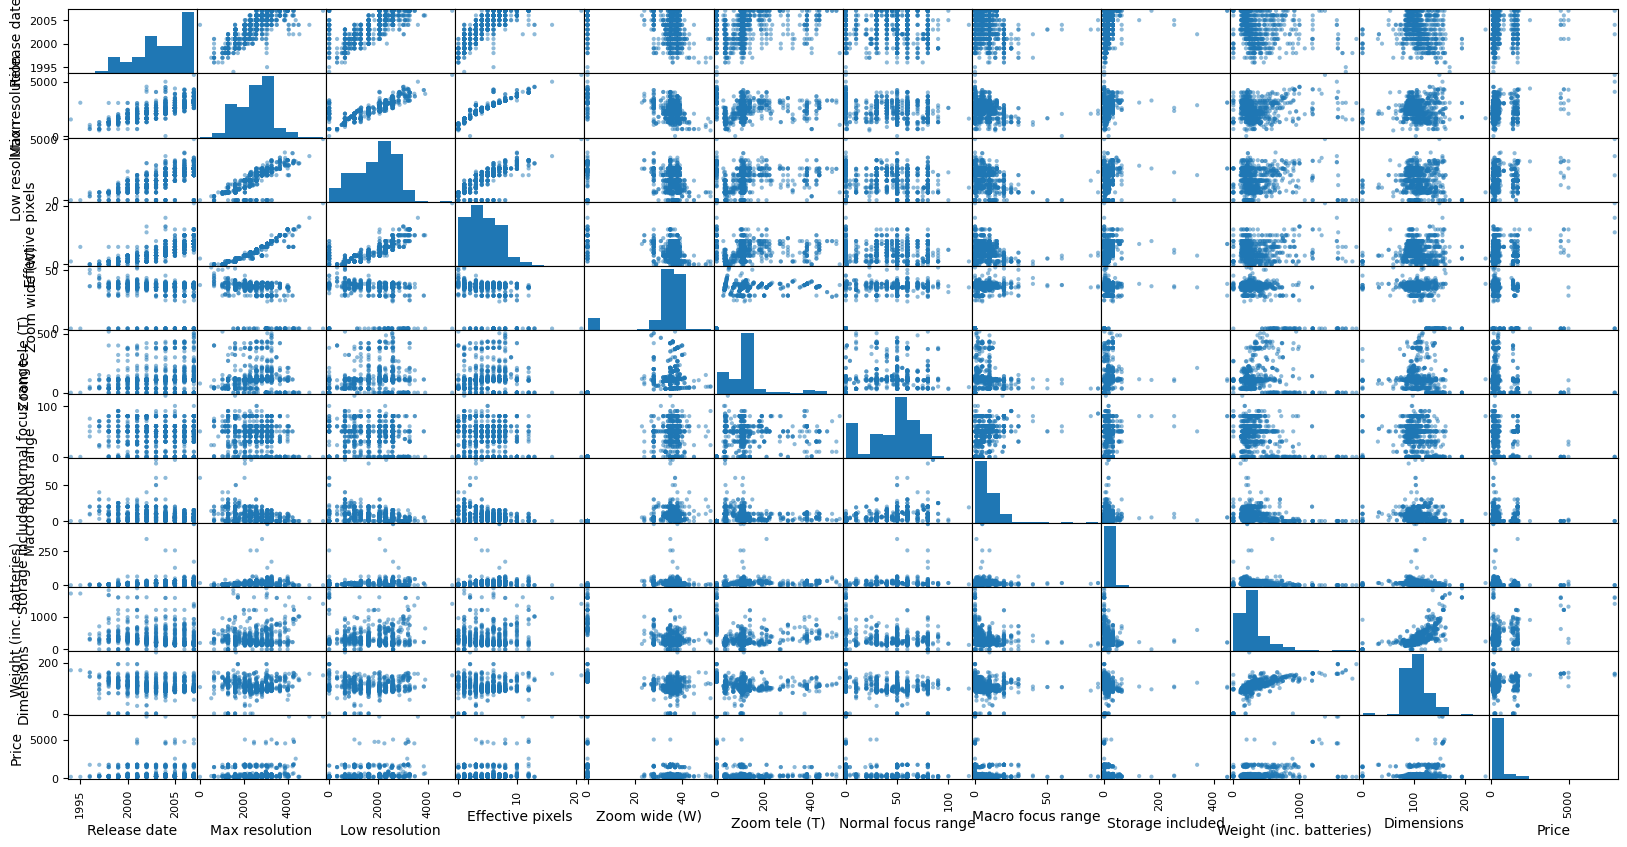

In [63]:
#Analyse graphique bidimentionnelle
scatter_matrix(cameras,figsize=(20,10))

<Axes: >

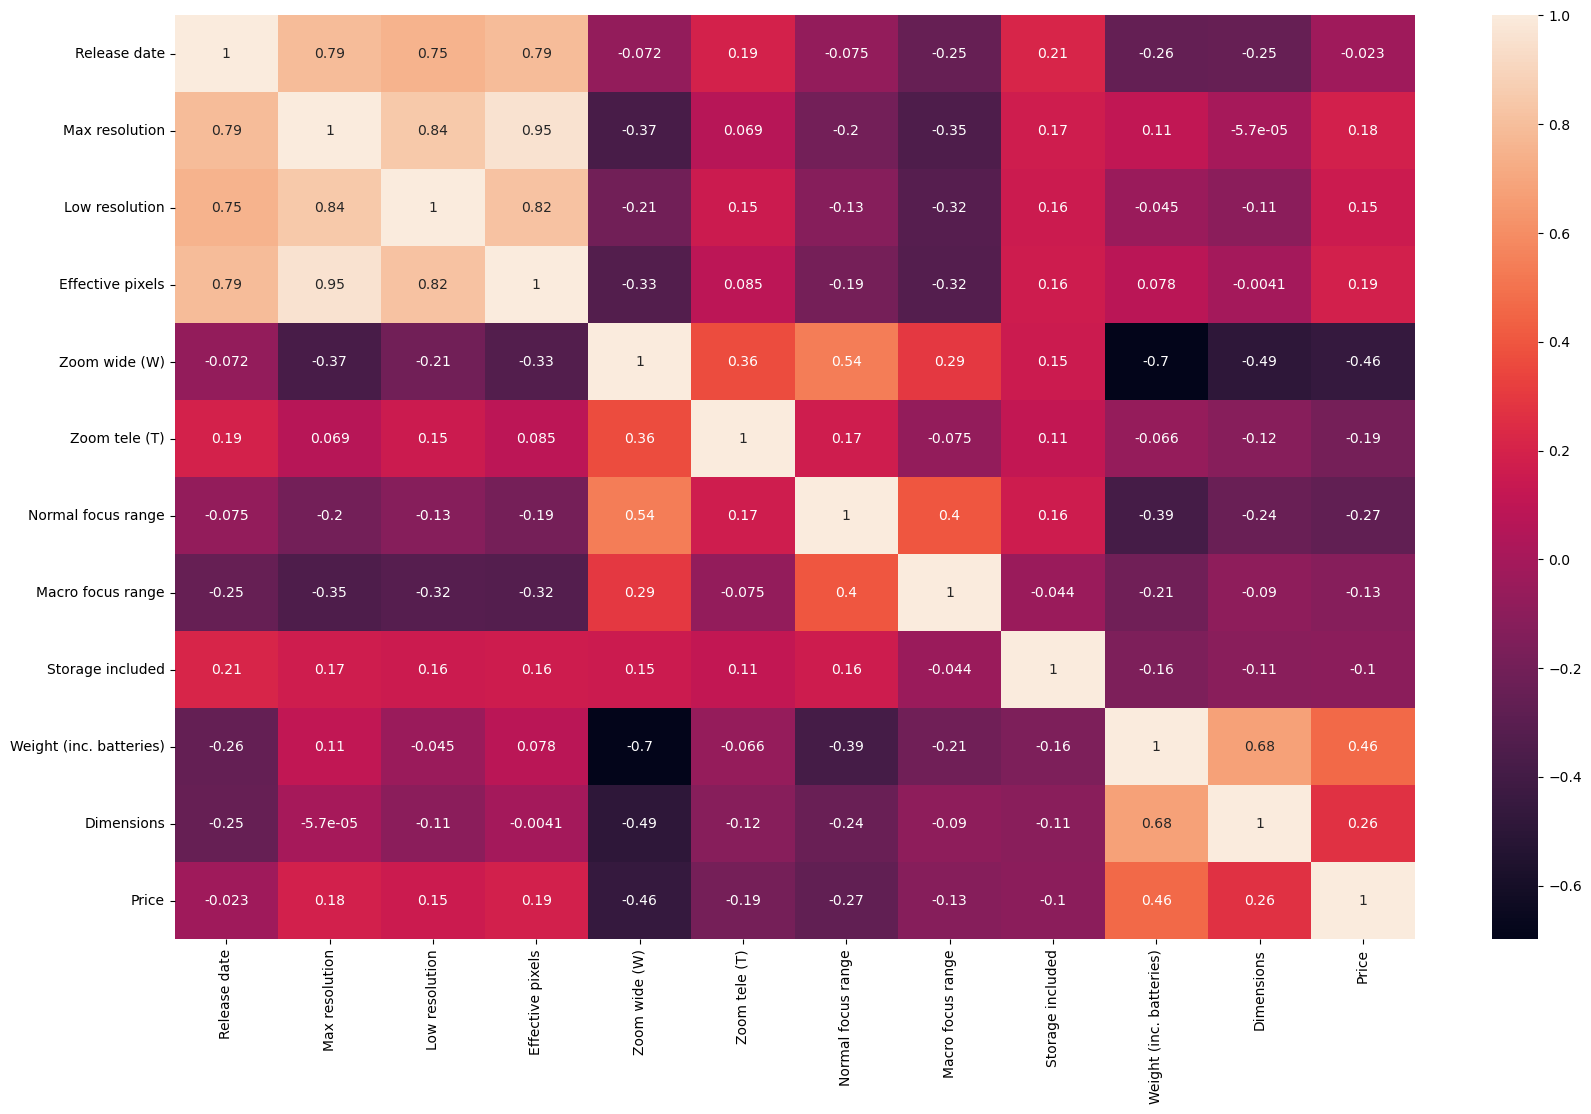

In [66]:
#matrice de correlation des variables quantitatives
corr = cameras.corr(numeric_only = True)
plt.subplots(figsize=(20,12))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)

In [12]:
#variables quantitatives centrées et réduites

# Extraction des variables quantitatives du dataframe cameras
x = cameras.iloc[:,1:].values
# Extraction de la variable cible (nom du modèle de caméra) du dataframe cameras
y = cameras.iloc[:,0]
# Standardisation des variables quantitatives en utilisant la fonction scale de scikit-learn
camerascr = preprocessing.scale(x)
print(camerascr)

[[-2.4182885  -1.90915516 -1.36881749 ...  0.38701722 -0.42733893
  -0.36665439]
 [-2.05104328 -1.57187768 -1.36881749 ...  0.38701722  2.17048692
  -0.36665439]
 [-1.31655284 -2.41507138 -2.14075756 ... -1.22660218 -4.34469536
  -0.36665439]
 ...
 [-0.94930762 -0.56004523 -0.90565345 ...  0.07966115  0.06748504
  -0.52045579]
 [-0.94930762 -0.09628869 -0.69336993 ...  0.07966115  0.06748504
  -0.52045579]
 [-0.5820624  -1.15028082 -1.17583247 ... -0.53505101 -0.79845691
  -0.43238148]]


In [13]:
#Determiner les valeurs et vecteurs probres de la matrice de corrélation
eig_vals, eig_vecs = np.linalg.eig(corr)
print('Eigenvectors \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.74453655e-01 -3.08419657e-01  8.07754331e-02  1.91106343e-02
  -5.85454746e-02 -8.56492958e-02  9.77731462e-02 -1.51929844e-01
  -1.71038610e-02  5.10364497e-01  6.45332442e-01 -1.92737713e-01]
 [-4.68286328e-01 -1.29594555e-01  5.05865364e-02 -1.14383717e-01
  -7.54309592e-02 -1.17245824e-01 -2.67598720e-02  9.06653980e-02
   7.56860474e-01 -2.01046341e-01 -5.86018647e-02  3.21257264e-01]
 [-4.20837307e-01 -2.00830758e-01  3.59504858e-02 -5.96001281e-02
  -1.30385847e-01  2.26655295e-02 -5.97717756e-02 -8.88662952e-02
  -9.25787058e-02  1.88738032e-01 -6.67358932e-01 -5.09090827e-01]
 [-4.59822817e-01 -1.40910714e-01  5.19903621e-02 -1.19263973e-01
  -1.00978636e-01 -9.81659103e-02 -2.19111085e-03 -5.33711378e-04
  -6.39902172e-01 -2.84947414e-01 -4.02591505e-03  4.91178086e-01]
 [ 2.80620214e-01 -4.01690922e-01 -1.33779751e-01  5.67921732e-02
  -7.11076945e-02  1.55748180e-01 -6.15821936e-02 -4.82894088e-01
   6.58381089e-02  3.88073428e-01 -2.60083558e-01  4.99902

In [14]:
#Moyenne
#print('Moyenne \n%s' %np.mean(cameras,axis=0))
print('Moyenne \n%s' %cameras.mean(numeric_only=True))
#ecart-type
#print('Ecart-type \n%s' %np.std(cameras,axis=0))
print('Moyenne \n%s' %cameras.std(numeric_only=True))

Moyenne 
Release date               2003.584942
Max resolution             2473.084942
Low resolution             1774.859073
Effective pixels              4.589768
Zoom wide (W)                32.955598
Zoom tele (T)               121.544402
Normal focus range           44.134170
Macro focus range             7.785714
Storage included             17.447876
Weight (inc. batteries)     319.265444
Dimensions                  105.363417
Price                       457.921815
dtype: float64
Moyenne 
Release date                 2.724291
Max resolution             759.385536
Low resolution             829.480329
Effective pixels             2.842849
Zoom wide (W)               10.341229
Zoom tele (T)               93.544197
Normal focus range          24.163900
Macro focus range            8.103702
Storage included            27.440655
Weight (inc. batteries)    260.410137
Dimensions                  24.262761
Price                      761.088735
dtype: float64


In [17]:
#Since PCA is effected by scale, we need to scale features in the data before applying PCA.
x = StandardScaler().fit_transform(cameras_clean)
print(x)

[[-2.4182885  -1.90915516 -1.36881749 ...  0.38701722 -0.42733893
  -0.36665439]
 [-2.05104328 -1.57187768 -1.36881749 ...  0.38701722  2.17048692
  -0.36665439]
 [-1.31655284 -2.41507138 -2.14075756 ... -1.22660218 -4.34469536
  -0.36665439]
 ...
 [-0.94930762 -0.56004523 -0.90565345 ...  0.07966115  0.06748504
  -0.52045579]
 [-0.94930762 -0.09628869 -0.69336993 ...  0.07966115  0.06748504
  -0.52045579]
 [-0.5820624  -1.15028082 -1.17583247 ... -0.53505101 -0.79845691
  -0.43238148]]


In [18]:
#Application ACP
#instanciation
acp = PCA(n_components=12)
acp.fit(x)

PCA(n_components=12)

In [23]:
#nombre de composantes calculées
print('Nombre de composantes : %s' %acp.n_components_)
#variance expliquée
print('variance expliquée : \n%s' %acp.explained_variance_)
#proportion de variance expliquée (% information)
print("proportion de variance expliquée : \n%s" %acp.explained_variance_ratio_)
eigval = acp.explained_variance_
print('Nombre de composantes : \n%s' %eigval)

Nombre de composantes : 12
variance expliquée : 
[3.96229758 2.99807761 1.06459973 0.98488538 0.87514615 0.69591346
 0.51580957 0.34423448 0.22706153 0.18515353 0.11696886 0.04144632]
proportion de variance expliquée : 
[0.32987275 0.24959864 0.08863101 0.08199456 0.07285845 0.05793681
 0.04294264 0.02865852 0.01890353 0.01541457 0.009738   0.00345053]
Nombre de composantes : 
[3.96229758 2.99807761 1.06459973 0.98488538 0.87514615 0.69591346
 0.51580957 0.34423448 0.22706153 0.18515353 0.11696886 0.04144632]


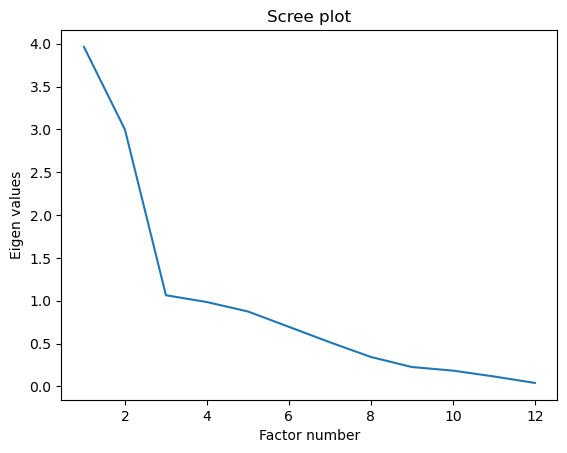

In [24]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

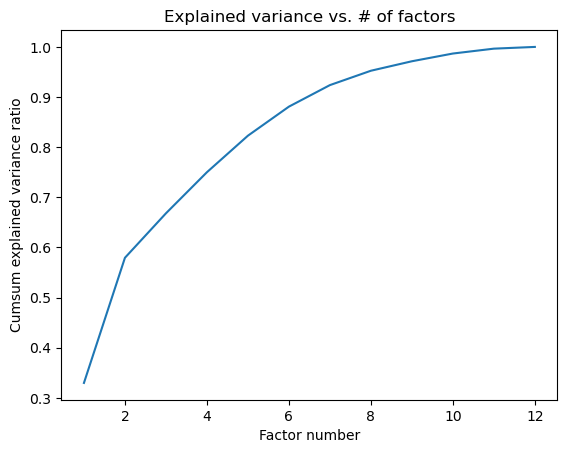

In [25]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [26]:
#proportion de variance expliquée (% information)
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(12)], 
        "Variance expliquée" : acp.explained_variance_,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    }
)
print(eig)

   Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0       Dim1            3.962298                  33.0                   33.0
1       Dim2            2.998078                  25.0                   58.0
2       Dim3            1.064600                   9.0                   67.0
3       Dim4            0.984885                   8.0                   75.0
4       Dim5            0.875146                   7.0                   82.0
5       Dim6            0.695913                   6.0                   88.0
6       Dim7            0.515810                   4.0                   92.0
7       Dim8            0.344234                   3.0                   95.0
8       Dim9            0.227062                   2.0                   97.0
9      Dim10            0.185154                   2.0                   99.0
10     Dim11            0.116969                   1.0                  100.0
11     Dim12            0.041446                   0.0          

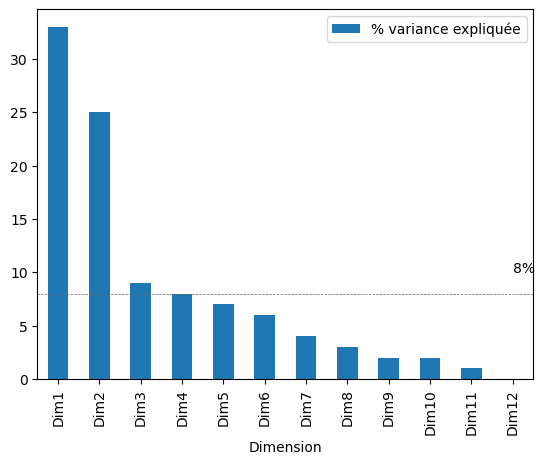

In [27]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(11, 10, "8%")
plt.axhline(y = 8, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 8 = 100 / 16 (nb dimensions)
plt.show()

In [28]:
#on affiche les deux premiers axes
cameras_acp = acp.fit_transform(x)
cameras_acp


array([[-4.58598772e+00,  7.10907565e-01, -7.01022699e-01, ...,
         5.45765027e-03,  1.05764521e-01,  2.18106301e-01],
       [-2.49085685e+00,  2.18088352e+00,  1.39222073e+00, ...,
         1.26585979e-01,  3.90675266e-01,  1.65986378e-01],
       [-3.54812416e+00, -6.48658416e-01, -1.85955835e+00, ...,
         7.60953673e-01, -2.50991673e-01,  5.53644844e-01],
       ...,
       [-1.79898437e+00,  1.35750734e-01,  3.85798653e-02, ...,
         2.14599678e-01,  1.80080586e-01,  3.34791614e-03],
       [-1.47427372e+00, -2.86565786e-02,  8.93772784e-02, ...,
         2.45838901e-01,  2.37687453e-01, -3.24261937e-01],
       [-2.56869357e+00,  5.52330067e-02, -1.29718627e+00, ...,
         1.63950919e-02, -2.78033156e-01, -9.26800935e-02]])

In [29]:
cameras_pca_df = pd.DataFrame({'id':cameras_clean.columns,'COR1':acp.components_[0],'COR2':acp.components_[1]})
cameras_pca_df

,id,COR1,COR2
0,Release date,0.374454,-0.308420
1,Max resolution,0.468286,-0.129595
2,Low resolution,0.420837,-0.200831
3,Effective pixels,0.459823,-0.140911
4,Zoom wide (W),-0.280620,-0.401691
5,Zoom tele (T),0.015607,-0.231099
6,Normal focus range,-0.211834,-0.291105
7,Macro focus range,-0.259591,-0.074797
8,Storage included,0.062408,-0.211445
9,Weight (inc. batteries),0.142899,0.470833


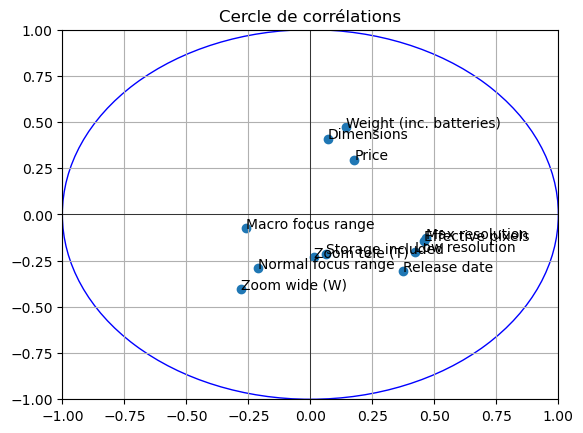

In [30]:
# Cercle de corrélations
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.set_title("Cercle de corrélations")

for i in range(len(cameras_pca_df)):
    ax.annotate(cameras_pca_df['id'][i], (cameras_pca_df['COR1'][i], cameras_pca_df['COR2'][i]))
# Afficher le cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
ax.add_artist(circle)
# Afficher la grille
plt.grid(True)
ax.scatter(cameras_pca_df['COR1'], cameras_pca_df['COR2'])
plt.show()

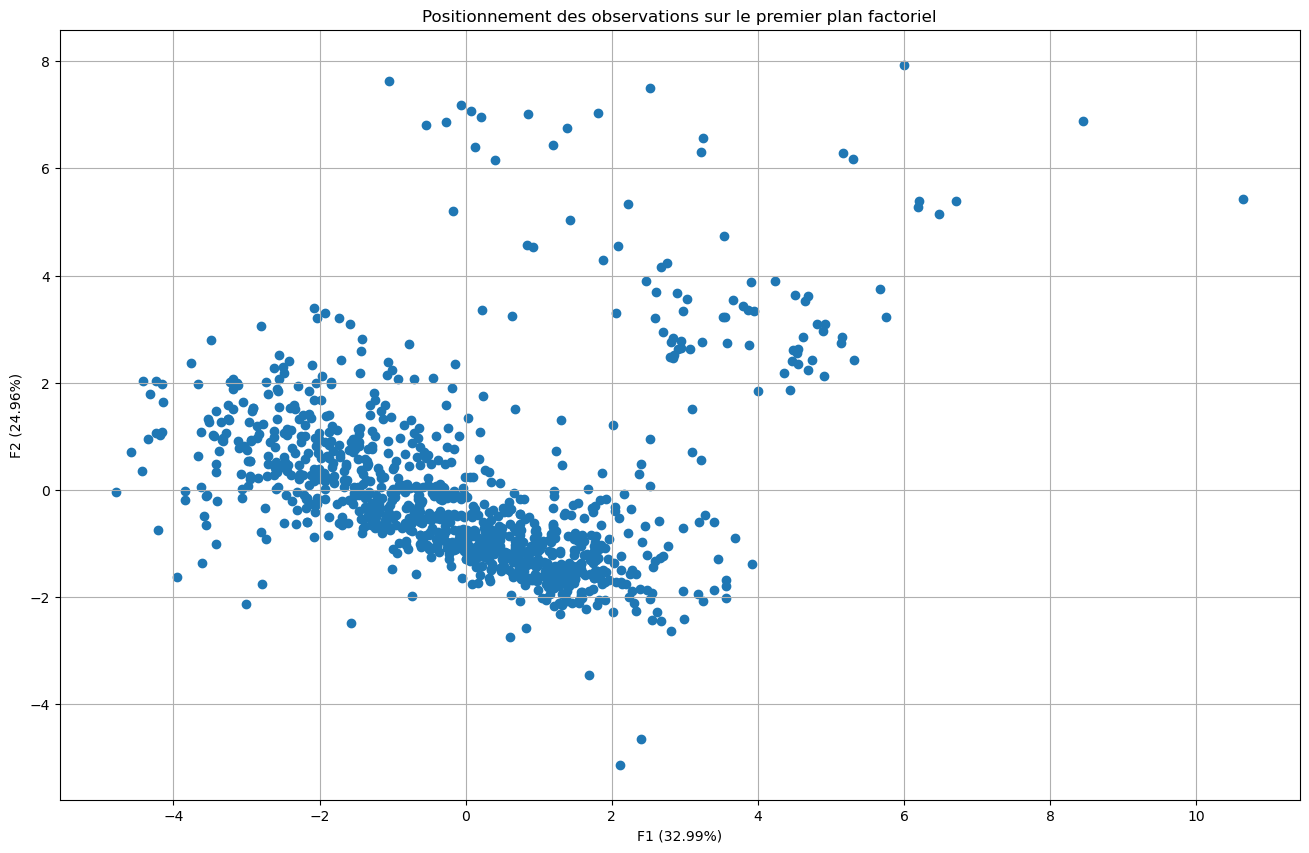

In [31]:
# Affichage du positionnement des observations sur le premier plan factoriel
plt.figure(figsize=(16, 10))
plt.scatter(cameras_acp[:, 0], cameras_acp[:, 1])
plt.title('Positionnement des observations sur le premier plan factoriel')
plt.xlabel('F1 ({}%)'.format(np.round(acp.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('F2 ({}%)'.format(np.round(acp.explained_variance_ratio_[1] * 100, 2)))
# Ajout des labels des observations
for i, txt in enumerate(cameras_clean.index):
    #plt.annotate(cameras.loc[int(txt),'Model'], (cameras_acp[i, 0], cameras_acp[i, 1]))
    plt.annotate('', (cameras_acp[i, 0], cameras_acp[i, 1]))
plt.grid(True)
plt.show()


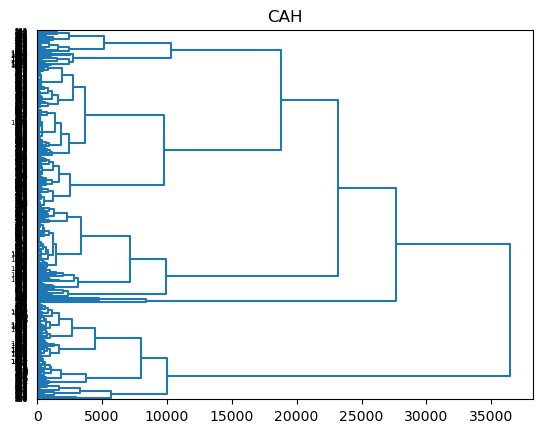

In [41]:
#librairies pour la CAH
#from matplotlib import pyplot as plt
#from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
#Z = linkage(cameras_clean,method='ward',metric='euclidean')

#affichage du dendrogramme
#plt.title("CAH")
#dendrogram(Z,labels=cameras_clean.index,orientation='right',color_threshold=0)
#plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

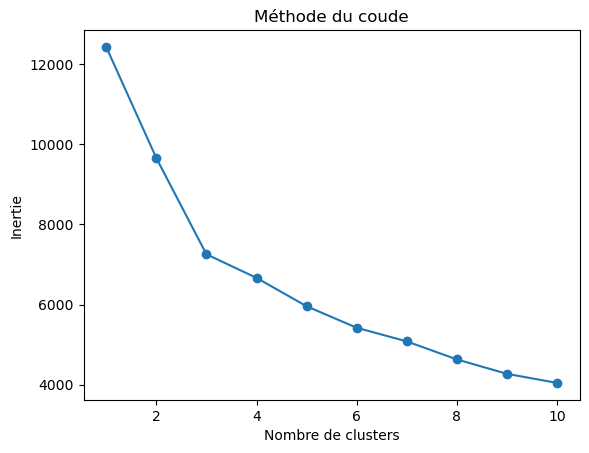

In [56]:
#clustering K-means avec la methode du coude

# Liste des inerties pour chaque nombre de clusters
inertia_values = []

# Nombre maximal de clusters à tester
max_clusters = 10

# Boucle pour tester différents nombres de clusters
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cameras_acp)
    inertia_values.append(kmeans.inertia_)

# Affichage de la méthode du coude
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


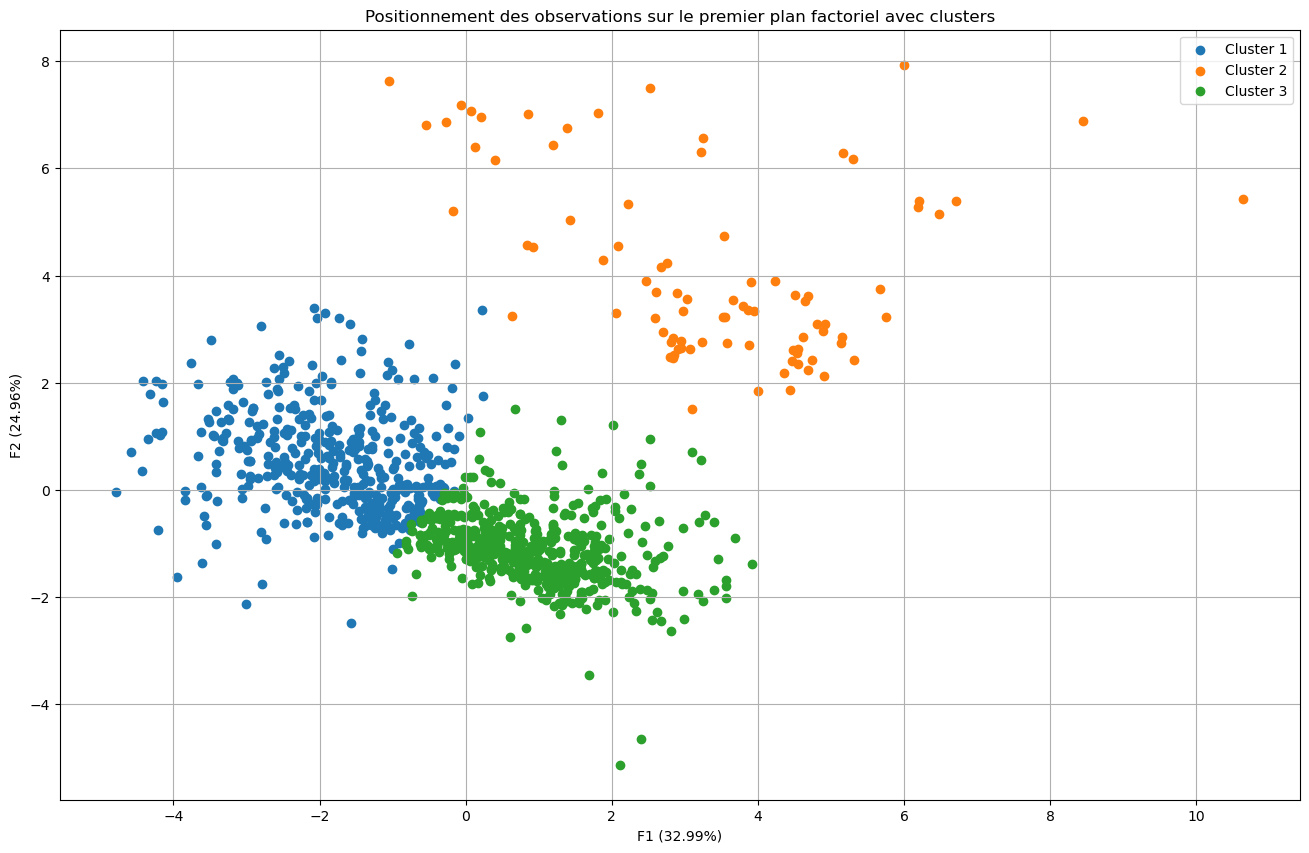

In [57]:
# Nombre optimal de clusters (selon la méthode du coude)
optimal_clusters = 3

# Appliquer K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cameras_clusters = kmeans.fit_predict(cameras_acp)

# Ajouter les informations de cluster au DataFrame original
cameras_clean['Cluster'] = cameras_clusters

# Affichage du positionnement des observations sur le premier plan factoriel avec couleurs par cluster
plt.figure(figsize=(16, 10))
for cluster in range(optimal_clusters):
    plt.scatter(cameras_acp[cameras_clusters == cluster, 0], cameras_acp[cameras_clusters == cluster, 1], label=f'Cluster {cluster + 1}')

plt.title('Positionnement des observations sur le premier plan factoriel avec clusters')
plt.xlabel('F1 ({}%)'.format(np.round(acp.explained_variance_ratio_[0] * 100, 2)))
plt.ylabel('F2 ({}%)'.format(np.round(acp.explained_variance_ratio_[1] * 100, 2)))
plt.legend()
plt.grid(True)
plt.show()